In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [6]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [7]:
df=df[df['sex']!='.']
df.shape

(343, 7)

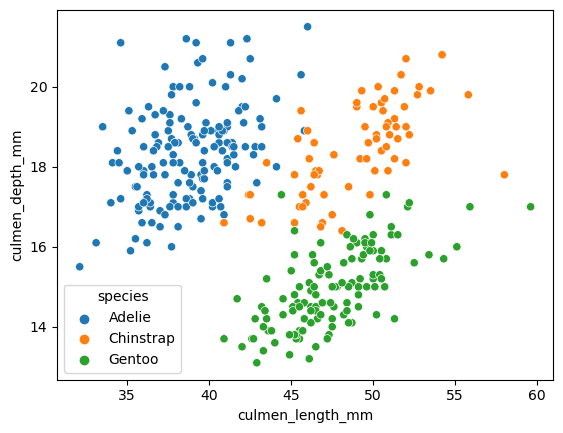

In [8]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')
plt.show()

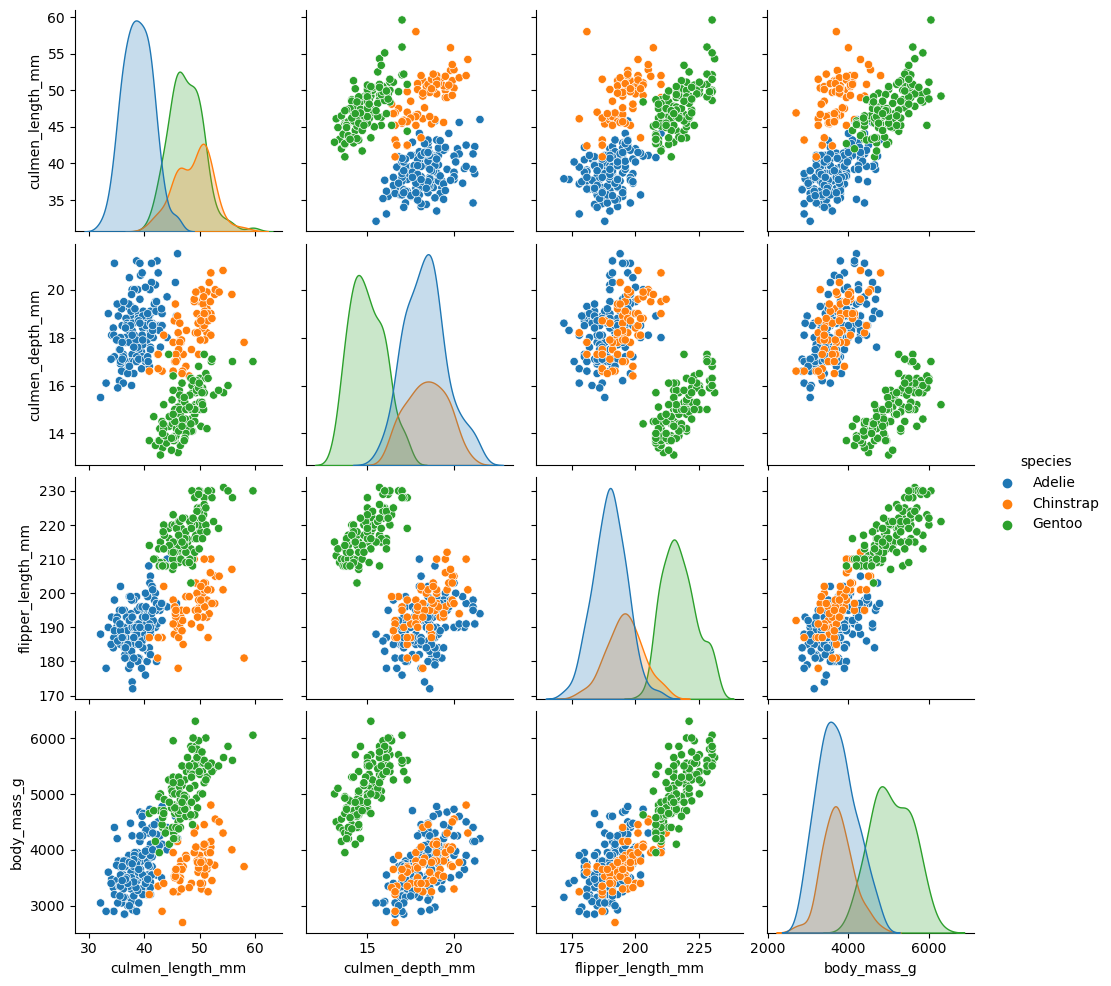

In [9]:
sns.pairplot(df,hue='species')
plt.show()

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
df=df.dropna()
df.shape

(333, 7)

In [12]:
#encoding

In [13]:
df1=df.drop('species',axis=1)
x=pd.get_dummies(df1,drop_first=True)

In [14]:
y=df['species']

In [15]:
#train & test

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
x_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
165,52.0,18.1,201.0,4050.0,1,0,1
156,52.7,19.8,197.0,3725.0,1,0,1
112,39.7,17.7,193.0,3200.0,0,0,0
220,46.1,13.2,211.0,4500.0,0,0,0
96,38.1,18.6,190.0,3700.0,1,0,0
...,...,...,...,...,...,...,...
332,43.5,15.2,213.0,4650.0,0,0,0
198,50.1,17.9,190.0,3400.0,1,0,0
123,41.4,18.5,202.0,3875.0,0,1,1
53,42.0,19.5,200.0,4050.0,0,0,1


In [18]:
x_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
62,37.6,17.0,185.0,3600.0,0,0,0
60,35.7,16.9,185.0,3150.0,0,0,0
283,54.3,15.7,231.0,5650.0,0,0,1
107,38.2,20.0,190.0,3900.0,0,0,1
65,41.6,18.0,192.0,3950.0,0,0,1
...,...,...,...,...,...,...,...
132,36.8,18.5,193.0,3500.0,1,0,0
222,48.7,14.1,210.0,4450.0,0,0,0
51,40.1,18.9,188.0,4300.0,0,0,1
226,45.4,14.6,211.0,4800.0,0,0,0


In [19]:
#modeling & evaluation
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier(random_state=0)
dt_default.fit(x_train,y_train)

#prediction
train_pred=dt_default.predict(x_train)
test_pred=dt_default.predict(x_test)

#evaluation

#1 train & test accuracy
from sklearn.metrics import accuracy_score
print('train_accuracy:',accuracy_score(train_pred,y_train))
print('test_accuracy:',accuracy_score(test_pred,y_test))

#2 cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt_default,x,y,cv=5)
print('cross validation score:',score.mean())

train_accuracy: 1.0
test_accuracy: 0.98
cross validation score: 0.9698778833107191


In [20]:
dt_default.predict([[30,2,150,4000,1,0,1]])

array(['Adelie'], dtype=object)

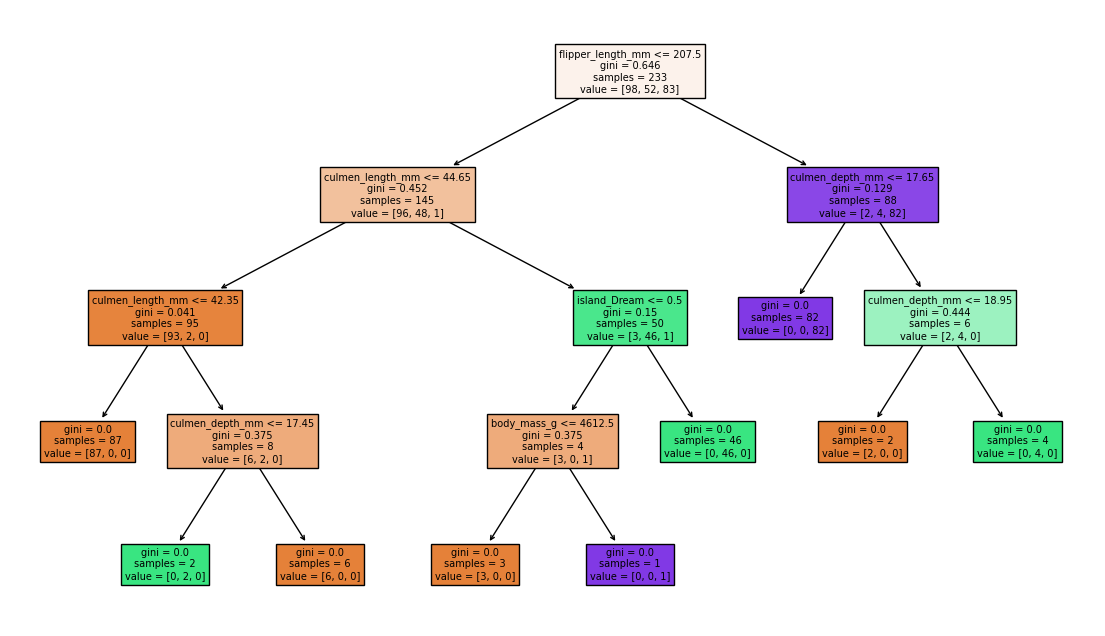

In [21]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt_default,filled=True,feature_names=x.columns)
plt.show()

In [22]:
dt_default.feature_importances_

array([0.36561338, 0.09537009, 0.48935164, 0.00995953, 0.03970535,
       0.        , 0.        ])

In [23]:
pd.DataFrame(index=x.columns,data=dt_default.feature_importances_,columns=['feature importance'])

,feature importance
culmen_length_mm,0.365613
culmen_depth_mm,0.095370
flipper_length_mm,0.489352
body_mass_g,0.009960
island_Dream,0.039705
island_Torgersen,0.000000
sex_MALE,0.000000


In [24]:
# hyperparam tuning
from sklearn.model_selection import GridSearchCV

#model
estimator=DecisionTreeClassifier(random_state=0)

#parameters
param_grid={'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [25]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [26]:
#final Decision Tree Model

In [27]:
x=x.drop(['island_Torgersen','sex_MALE'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

dt_bhp=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt_bhp.fit(x_train,y_train)

#prediction
train_pred=dt_bhp.predict(x_train)
test_pred=dt_bhp.predict(x_test)

#evaluation

#1 train & test accuracy

print('train_accuracy:',accuracy_score(train_pred,y_train))
print('test_accuracy:',accuracy_score(test_pred,y_test))

#2 cross validation score

score=cross_val_score(dt_bhp,x,y,cv=5)
print('cross validation score:',score.mean())

train_accuracy: 0.9871244635193133
test_accuracy: 0.95
cross validation score: 0.9608774310266849


In [28]:
dt_bhp.predict([[30,20,150,4000,1]])

array(['Adelie'], dtype=object)

In [29]:
#optimization--pruning of Decision Tree

In [35]:
def report_model(model):
    model.fit(x_train,y_train)
    test_pred=model.predict(x_test)
    train_pred=model.predict(x_train)
    print('train_accuracy:',accuracy_score(train_pred,y_train))
    print('test_accuracy:',accuracy_score(test_pred,y_test))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)

In [36]:
#max depth

train_accuracy: 0.9871244635193133
test_accuracy: 0.95


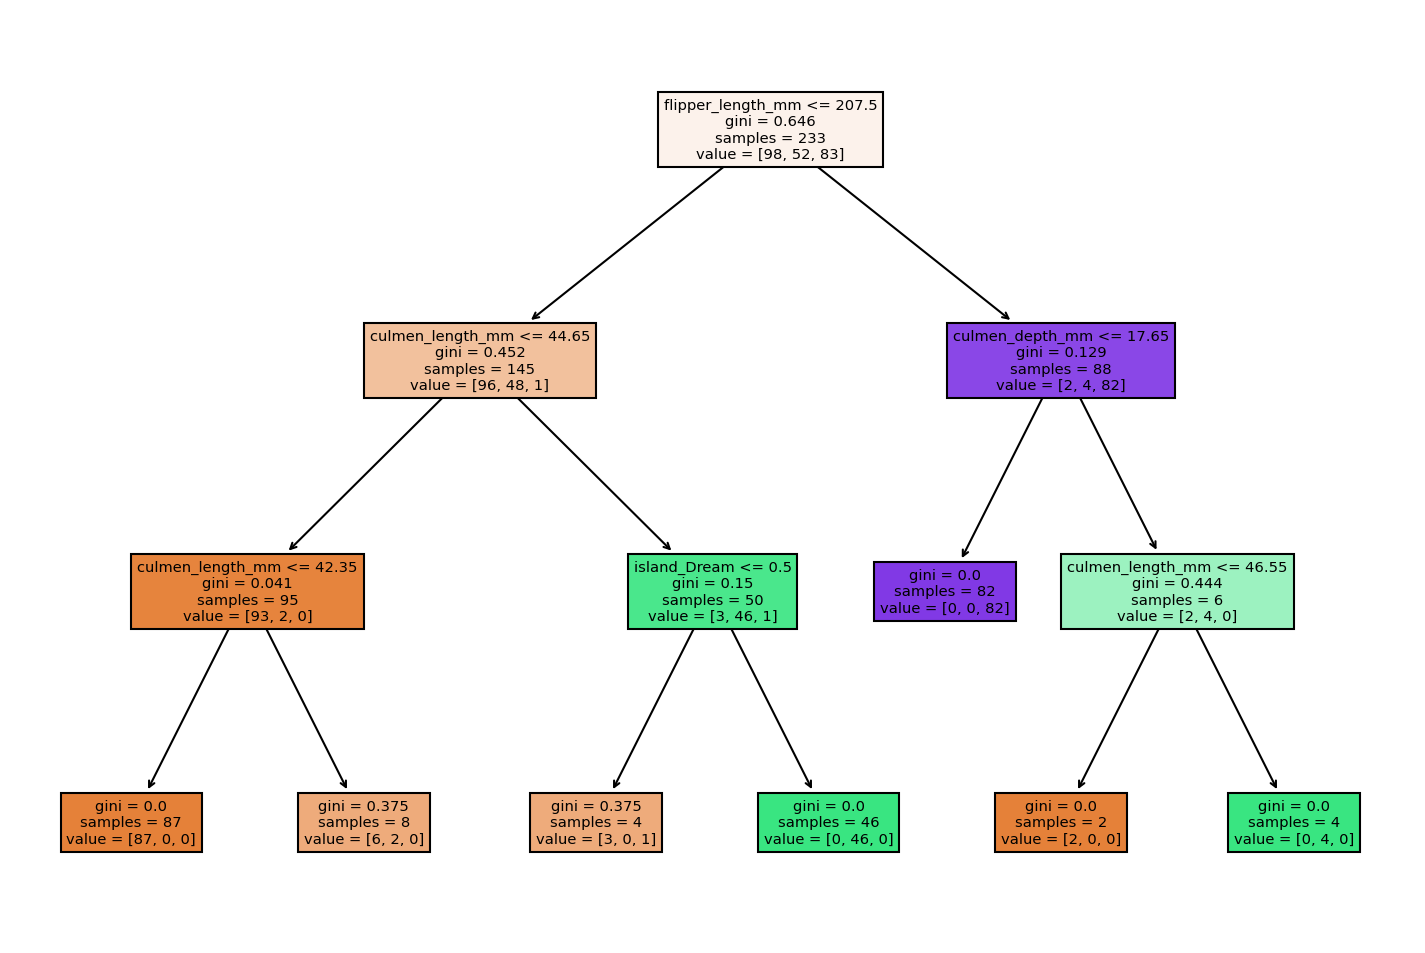

In [37]:
pruned_tree=DecisionTreeClassifier(max_depth=3)
report_model(pruned_tree)

In [38]:
#max leaf nodes

train_accuracy: 0.9871244635193133
test_accuracy: 0.95


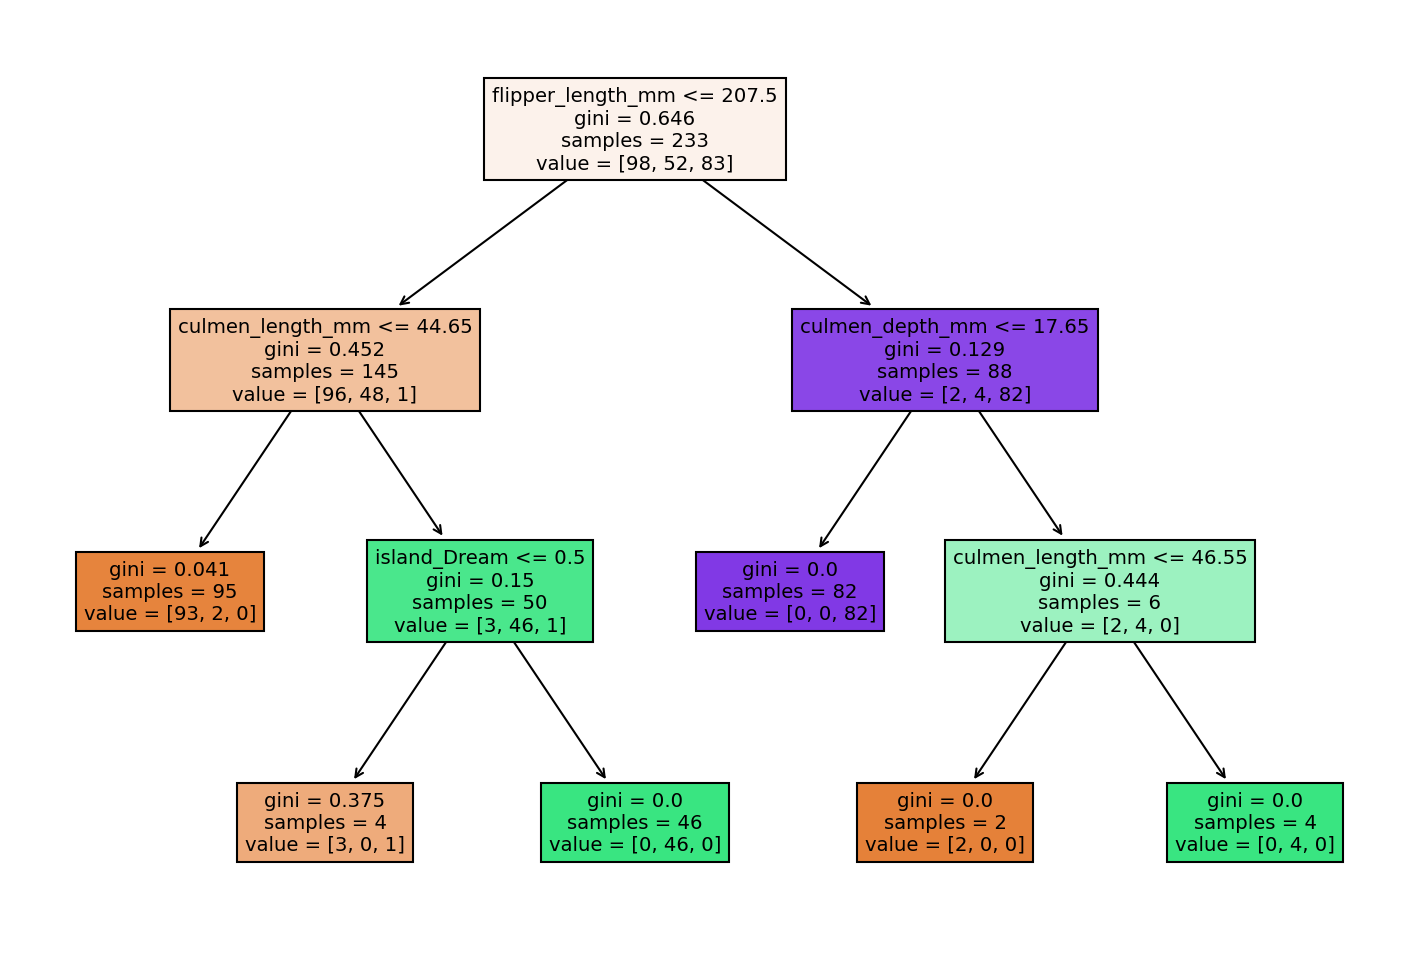

In [39]:
pruned_tree=DecisionTreeClassifier(max_leaf_nodes=6)
report_model(pruned_tree)